### CMSC 691 Data Science Project 
## Effects of Weather on Energy Consumption in New York City


By :
* **Mohit Nayak(GY45053)**
* **Vaishnavi Jamdade(TM39453)**


 
## ABSTRACT <br>

<div style="text-align: justify">  
Rapid growth of world population has higher impact on increasing households’ energy consumption. Also, various external environmental factors like weather conditions greatly impact energy consumption. To reduce energy consumption and minimize the environmental impact of households, measuring and understanding patterns in this energy use is paramount. Therefore, improving energy consumption methods is an important concern. Energy management through forecasting approaches as one of most effective methods is in focus of this project. Review of most elaborated methods is in our focus, where we investigate one of the many directions of energy prediction approaches which is to go through data driven methods. To take into account different patterns of consumption of energy on a monthly basis is prime focus of this project. To achieve interesting observations and to dive into the depth of this area, we are implementing regression models to predict energy consumption of households in each borough of New York City.
    
</div>

* *Keywords : consumption(KWH), Snowfall, meter number, borough, Min/Max temp, Linear regression*

## INTRODUCTION <br>

<div style="text-align: justify"> 
    
* Usage of energy in day to day life has become one of the major concerns today. Rapid growth of world population has higher impact on increasing energy consumption. In this project we are studying trends in Energy Consumption of households in New York City area. We have considered the 5 Boroughs along with FHA(Federal Housing Administration) and Non- Development Facility to observe variations in energy usage on a monthly basis. For this, we have used a dataset which gives us information about energy consumption in different areas. Furthermore, since energy consumption can be impacted due to various external factors such as Min/Max Temperatures, Snowfall and Snow Depth in that area, we have tried to integrate Weather data as well.

* We were able to see different trends in the consumption and how they were impacted by data from both these datasets as a whole. We have also tried to implement a model which predicts an approximate energy consumption for housholds throughout the boroughs.

</div>

## DATASETS USED 

Here we are trying to incorporate two datasets in our project. As mentioned above, we are targetting one densely populated geographical area which consumes pretty good amount of energy resources, that is the busy New York City area. This city has 5 boroughs. The dataset we used was from **NYC Open Data website** which gives monthly records of households in 5 Boroughs of NYC along with Non-Development facilities and FHA. This dataset had large number of records on a monthly basis of around 2,87,844 records from the years 2010 to 2019. The next dataset that we have used is Weather dataset from **National Weather Service Forecast Office website for NYC area** which gives us information about a number of environmental factors like Snowfall, Snow Depth, Precipitation, Minimum and Maximum temperatures. More information about each of the attributes in both the datasets is given below in detail.  
- Energy Data - https://data.cityofnewyork.us/Housing-Development/Electric-Consumption-And-Cost-2010-March-2019-/jr24-e7cr
- Weather Data - https://w2.weather.gov/climate/xmacis.php?wfo=okx

### Energy Dataset Attributes Description :

All the records on the dataset are on a monthly basis.
The energy usage dataset contains the following columns:
* Development Name - Name of the Development.
* Location - Building number. In order to run an analysis by building, you can use a combination of TDS and building number which gives a unique identifier for each building.
* Meter AMR - Is the meter Automatic Meter Reading (AMR), Interval or none.
* Meter Scope - The buildings or areas the account and meter supply
* TDS # - TDS (Tenant Data System) number is the unique identifier for all NYCHA developments. It is recommended to use it in order to run analysis by development. The TDS is also the unique link between NYCHA(NYC Housing Authorities) data sets.
* EDP - NYCHA Electronic Data Processing. Number used to identify individual NYCHA developments. EDP is used by NYCHA only to link data issued from a different system (the energy management system that was used by NYCHA before 2010). It is recommended to use the TDS # as a unique identifier of each development.
* RC Code - NYCHA budget responsibility code. Code representing a specific development.
* Funding Source - The development’s funding source including Federal, Mixed Finance, or an indication that the facility is a non development facility which means a non residential facility.
* AMP # - Abbreviation for Asset Management Project (AMP) numbers. HUD Development asset tracking number. An AMP number can consist of more than one development.
* Vendor Name - Utility vendor name.
* Revenue Month - Year and month of bill.
* Service Start Date - Bill start date
* Service End Date - Bill end date
*  days - Number of days on bill
* Estimated - Meter was not read for the time period. The consumption and cost are estimated.
* Current Charges - Total costs
* Rate Class - The rate applied to the account. Details about each rate (dollar value) are available on the vendor web site.
* Bill Analyzed - The bill was analyzed for billing errors by NYCHA's Utility Management system during the billing period.
* Consumption (KWH) - Total KWH consumption
* KWH Charges - Total KWH charges
* Consumption(KW) - Total KW consumption
* KW Charges - Total KW charges
* Other Charges - Total other charges

### Weather Dataset column description:
All records in the dataset have been taken on a monthly basis.
* Year - year on record
* Month - month on record
* Minimum Temperature - Minimum temperature recorded
* Maximum Temperature - Maximum temperature recorded
* Average Temperature - Mean temperature for the month
* Precipitation - Total rainfall amount in that year
* Snowfall - Average snowfall in that year
* Snowfall Depth - Total snowfall in that year

### Importing Required standard packages :

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Importing Energy Dataset :

In [2]:
import pandas as pd
df_energy = pd.read_csv('Energy Data.csv')

In [3]:
df_energy.head()

,Development Name,Borough,Account Name,Location,Meter AMR,Meter Scope,TDS #,EDP,RC Code,Funding Source,...,Meter Number,Estimated,Current Charges,Rate Class,Bill Analyzed,Consumption (KWH),KWH Charges,Consumption (KW),KW Charges,Other charges
0,OCEAN BAY APARTMENTS (OCEANSIDE),QUEENS,OCEAN BAY APARTMENTS (OCEANSIDE),BLD 07,NONE,BLD 07,51.0,573,Q005100,FEDERAL,...,96750012,N,5220.70,281-Sec Com Large Gen Use,Exception,30320,2967.67,67.0,1077.36,1175.67
1,BEACH 41ST STREET-BEACH CHANNEL DRIVE,QUEENS,BEACH 41ST STREET-BEACH CHANNEL DRIVE,BLD 01,NONE,BLD 01,165.0,282,Q016500,FEDERAL,...,080340657,N,25276.23,285-Prim Com Large Mult Per,Exception,133760,13092.20,500.2,7503.12,4680.91
2,BEACH 41ST STREET-BEACH CHANNEL DRIVE,QUEENS,BEACH 41ST STREET-BEACH CHANNEL DRIVE,BLD 03,NONE,BLD 03,165.0,282,Q016500,FEDERAL,...,080340658,N,30443.80,285-Prim Com Large Mult Per,Exception,161120,15770.15,595.6,9065.41,5608.24
3,HAMMEL,QUEENS,HAMMEL,BLD 08,NONE,Community Center,75.0,226,Q207500,FEDERAL,...,99268475,N,4371.11,281-Sec Com Large Gen Use,Yes,22920,2241.02,78.0,1212.43,917.66
4,BEACH 41ST STREET-BEACH CHANNEL DRIVE,QUEENS,BEACH 41ST STREET-BEACH CHANNEL DRIVE,BLD 04,NONE,BLD 04,165.0,282,Q016500,FEDERAL,...,080340655,N,12407.16,285-Prim Com Large Mult Per,Exception,63680,6232.89,252.5,3746.66,2427.61


### Listing out its attributes :

In [4]:
df_energy.columns

Index(['Development Name', 'Borough', 'Account Name', 'Location', 'Meter AMR',
       'Meter Scope', 'TDS #', 'EDP', 'RC Code', 'Funding Source', 'AMP #',
       'Vendor Name', 'UMIS BILL ID', 'Revenue Month', 'Service Start Date',
       'Service End Date', '# days', 'Meter Number', 'Estimated',
       'Current Charges', 'Rate Class', 'Bill Analyzed', 'Consumption (KWH)',
       'KWH Charges', 'Consumption (KW)', 'KW Charges', 'Other charges'],
      dtype='object')

### Total number of records in Energy Dataset : 

In [5]:
len(df_energy)

287844

## DATA ANALYSIS and DATA PREPROCESSING

### Deleting Service Start date and Service End Date

In [6]:
df_energy.drop('Service Start Date', axis=1, inplace=True)
df_energy.drop('Service End Date', axis=1, inplace=True)
df_energy.columns

Index(['Development Name', 'Borough', 'Account Name', 'Location', 'Meter AMR',
       'Meter Scope', 'TDS #', 'EDP', 'RC Code', 'Funding Source', 'AMP #',
       'Vendor Name', 'UMIS BILL ID', 'Revenue Month', '# days',
       'Meter Number', 'Estimated', 'Current Charges', 'Rate Class',
       'Bill Analyzed', 'Consumption (KWH)', 'KWH Charges', 'Consumption (KW)',
       'KW Charges', 'Other charges'],
      dtype='object')

In [7]:
df_energy['Revenue Month'].head(10)

0    2019-09
1    2019-09
2    2019-09
3    2019-09
4    2019-09
5    2019-09
6    2019-09
7    2019-09
8    2019-09
9    2019-09
Name: Revenue Month, dtype: object

* As we can see that we have a column 'Revenue Month' which gives us month and year as well. So we will extract these two attributes as two separate columns since it will be feasible in evaluating and to study the data on a monthly and yearly basis separately .

### Extracting Revenue Year :

In [8]:
df_energy['Revenue Year']=df_energy['Revenue Month'].apply(lambda x: int(x[:4]) )

### Extracting month out of Revenue Month : 

In [9]:
df_energy['Revenue Month']=df_energy['Revenue Month'].apply(lambda x: int(x[5:7]) )

In [10]:
df_energy.columns

Index(['Development Name', 'Borough', 'Account Name', 'Location', 'Meter AMR',
       'Meter Scope', 'TDS #', 'EDP', 'RC Code', 'Funding Source', 'AMP #',
       'Vendor Name', 'UMIS BILL ID', 'Revenue Month', '# days',
       'Meter Number', 'Estimated', 'Current Charges', 'Rate Class',
       'Bill Analyzed', 'Consumption (KWH)', 'KWH Charges', 'Consumption (KW)',
       'KW Charges', 'Other charges', 'Revenue Year'],
      dtype='object')

### Checking for NULL values present if any :

In [11]:
df_energy.isnull().sum()

Development Name          0
Borough                   0
Account Name              0
Location               7611
Meter AMR                74
Meter Scope          272779
TDS #                  1257
EDP                       0
RC Code                   0
Funding Source            0
AMP #                  1225
Vendor Name               0
UMIS BILL ID              0
Revenue Month             0
# days                    0
Meter Number              0
Estimated               337
Current Charges           0
Rate Class                0
Bill Analyzed             0
Consumption (KWH)         0
KWH Charges               0
Consumption (KW)          0
KW Charges                0
Other charges             0
Revenue Year              0
dtype: int64

### Checking the values for each column :

In [12]:
df_energy['Development Name'].unique()

array(['OCEAN BAY APARTMENTS (OCEANSIDE)',
       'BEACH 41ST STREET-BEACH CHANNEL DRIVE', 'HAMMEL', 'REDFERN',
       'HUNTS POINT AVENUE REHAB', 'RALPH AVENUE REHAB', 'INGERSOLL',
       'WOODSON', 'TILDEN', 'LINDEN', 'CROWN HEIGHTS',
       'RANDALL AVENUE-BALCOM AVENUE', 'FOREST', 'WEBSTER', 'CARVER',
       'WILSON', 'CYPRESS HILLS', 'HUGHES APARTMENTS', 'EDENWALD',
       'THROGGS NECK ADDITION', 'EASTCHESTER GARDENS',
       'EAST NEW YORK CITY LINE', 'BUSHWICK II (GROUPS B & D)',
       'PATTERSON', 'CORSI HOUSES', 'EAST 004TH STREET REHAB',
       'THROGGS NECK', 'AMSTERDAM', 'PELHAM PARKWAY', 'BUTLER', 'LINCOLN',
       'MARCY', 'CLAREMONT REHAB (GROUP 3)', 'SAINT NICHOLAS', 'BREVOORT',
       '131 SAINT NICHOLAS AVENUE',
       'WASHINGTON HEIGHTS REHAB (GROUPS 1&2)',
       'HOWARD AVENUE-PARK PLACE', 'SAMUEL (CITY)',
       'MARCY AVENUE-GREENE AVENUE SITE A', 'COOPER PARK',
       'MARCY AVENUE-GREENE AVENUE SITE B',
       'PENNSYLVANIA AVENUE-WORTMAN AVENUE', 'BORINQUEN

In [13]:
df_energy['Borough'].unique()

array(['QUEENS', 'BRONX', 'BROOKLYN', 'MANHATTAN', 'STATEN ISLAND', 'FHA',
       'NON DEVELOPMENT FACILITY'], dtype=object)

In [14]:
df_energy['Account Name'].unique()

array(['OCEAN BAY APARTMENTS (OCEANSIDE)',
       'BEACH 41ST STREET-BEACH CHANNEL DRIVE', 'HAMMEL', 'REDFERN',
       'HUNTS POINT AVENUE REHAB', 'RALPH AVENUE REHAB',
       'WHITMAN/INGERSOLL', 'WOODSON', 'TILDEN', 'BOULEVARD/LINDEN',
       'CROWN HEIGHTS', 'RANDALL AVENUE-BALCOM AVENUE', 'FOREST',
       'WEBSTER', 'CARVER', 'WILSON', 'CYPRESS HILLS',
       'HUGHES APARTMENTS', 'EDENWALD', 'THROGGS NECK ADDITION',
       'EASTCHESTER GARDENS', 'EAST NEW YORK CITY LINE',
       'BUSHWICK II (GROUPS B & D)', 'PATTERSON', 'CORSI HOUSES',
       'EAST 004TH STREET REHAB', 'THROGGS NECK', 'AMSTERDAM',
       'PELHAM PARKWAY', 'BUTLER', 'LINCOLN', 'MARCY',
       'CLAREMONT REHAB (GROUP 3)', 'SAINT NICHOLAS', 'BREVOORT',
       'SAINT NICHOLAS AVENUE', 'WASHINGTON HEIGHTS REHAB (GROUPS 1&2)',
       'HOWARD AVENUE-PARK PLACE', 'SAMUEL (CITY)',
       'MARCY AVENUE-GREENE AVENUE SITE A', 'COOPER PARK',
       'MARCY AVENUE-GREENE AVENUE SITE B',
       'PENNSYLVANIA AVENUE-WORTMAN AVENU

In [15]:
df_energy['Account Name'] == df_energy['Development Name']

0          True
1          True
2          True
3          True
4          True
5          True
6          True
7          True
8          True
9          True
10         True
11         True
12         True
13         True
14         True
15         True
16        False
17         True
18         True
19         True
20        False
21        False
22         True
23         True
24        False
25         True
26         True
27         True
28        False
29         True
          ...  
287814     True
287815     True
287816     True
287817     True
287818     True
287819     True
287820    False
287821     True
287822     True
287823     True
287824     True
287825    False
287826     True
287827    False
287828     True
287829    False
287830    False
287831    False
287832    False
287833    False
287834     True
287835    False
287836     True
287837     True
287838     True
287839     True
287840    False
287841    False
287842     True
287843     True
Length: 287844, dtype: b

#### Here we can see that Development Name and Account Name are same in most of the cases but it it is different in some. So we checked for its unique values.

In [16]:
df_energy['Location'].unique()

array(['BLD 07', 'BLD 01', 'BLD 03', 'BLD 08', 'BLD 04', 'BLD 02',
       'BLD 06', 'BLD 02 - Community Center', 'BLD 05',
       'INGERSOLL BLD 36', 'INGERSOLL BLD 22', 'LINDEN BLD 02', 'BLD 3',
       'INGERSOLL BLD 18', 'BLD 35', 'BLD 15', 'INGERSOLL BLD 19',
       'BLD 10', 'BLD 11', 'CARVER BLD 08', 'LINDEN BLD 05', 'BLD 12',
       'BLD 09', 'BLD 36', 'LINDEN BLD 08', 'CARVER BLD 03', 'BLD 13',
       'BLD 14', 'LINDEN BLD 04', 'BLD 33', 'INGERSOLL BLD 16', 'BLD 32',
       'BLD 41', 'BLD 37', 'BLD 31', 'BLD 30', 'BLD 21', 'BLD 17',
       'BLD 23', 'BLD 20', 'BLD 27', 'BLD 29', 'BLD 24', 'BLD 25',
       'BLD 28', 'BLD 26', 'BLD 19', 'BLD 16', 'BLD 18', 'BLD 39',
       'CARVER BLD 05', 'BLD 34', 'CARVER BLD 07', 'CARVER BLD 13',
       'BLD 22', 'LINDEN BLD 10', 'LINDEN BLD 11', 'BLD 45',
       'LINDEN BLD 18', 'LINDEN BLD 01', 'LINDEN BLD 17', 'CARVER BLD 04',
       'CARVER BLD 12', 'INGERSOLL BLD 25', 'INGERSOLL BLD 27',
       'INGERSOLL BLD 33', 'BLD 16 - Community Cente

In [17]:
df_energy[df_energy['Location']==np.nan]

,Development Name,Borough,Account Name,Location,Meter AMR,Meter Scope,TDS #,EDP,RC Code,Funding Source,...,Estimated,Current Charges,Rate Class,Bill Analyzed,Consumption (KWH),KWH Charges,Consumption (KW),KW Charges,Other charges,Revenue Year


In [18]:
df_energy['Meter AMR'].unique()

array(['NONE', 'AMR', 'INTERVAL', nan], dtype=object)

#### We can drop these null entries but even after dropping only records having null values , we can infer that this column is not going to help us in establishing a concrete relation between attributes and proves to be insignificant than other attributes, hence we can ignore and DROP the entire Meter AMR column along with Meter Scope column 

In [19]:
df_energy.drop('Meter AMR', axis=1, inplace=True)

In [20]:
df_energy.drop('Meter Scope', axis=1, inplace=True)

In [21]:
sorted(df_energy['TDS #'].unique())

[1.0,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 14.0,
 15.0,
 16.0,
 17.0,
 18.0,
 19.0,
 20.0,
 21.0,
 22.0,
 23.0,
 24.0,
 25.0,
 26.0,
 27.0,
 28.0,
 29.0,
 30.0,
 31.0,
 32.0,
 33.0,
 34.0,
 35.0,
 36.0,
 37.0,
 38.0,
 39.0,
 40.0,
 41.0,
 42.0,
 43.0,
 44.0,
 45.0,
 46.0,
 47.0,
 48.0,
 49.0,
 50.0,
 51.0,
 52.0,
 53.0,
 54.0,
 55.0,
 56.0,
 57.0,
 58.0,
 59.0,
 60.0,
 61.0,
 62.0,
 63.0,
 64.0,
 65.0,
 66.0,
 67.0,
 68.0,
 69.0,
 70.0,
 71.0,
 72.0,
 73.0,
 74.0,
 75.0,
 76.0,
 77.0,
 78.0,
 79.0,
 80.0,
 81.0,
 82.0,
 83.0,
 84.0,
 85.0,
 86.0,
 87.0,
 88.0,
 89.0,
 91.0,
 92.0,
 93.0,
 94.0,
 95.0,
 96.0,
 97.0,
 98.0,
 99.0,
 100.0,
 101.0,
 102.0,
 103.0,
 109.0,
 111.0,
 112.0,
 113.0,
 114.0,
 116.0,
 117.0,
 118.0,
 120.0,
 121.0,
 122.0,
 123.0,
 124.0,
 125.0,
 126.0,
 127.0,
 128.0,
 129.0,
 130.0,
 131.0,
 132.0,
 133.0,
 134.0,
 135.0,
 136.0,
 138.0,
 139.0,
 140.0,
 141.0,
 142.0,
 143.0,
 145.0,
 146.0,
 147.0,
 148.0,
 149.0,
 150.0,
 151.0,
 

* As value 0 is not present we can replace nan values with zero.

In [22]:
df_energy['TDS #'].replace(np.nan, 0, inplace=True)

In [23]:
df_energy['EDP'].unique()

array([573, 282, 226, 525, 806, 771, 510, 285, 233, 672, 331, 364, 535,
       231, 534, 539, 536, 275, 214, 303, 313, 378, 566, 522, 359, 833,
       218, 530, 586, 435, 513, 514, 750, 211, 213, 264, 563, 551, 650,
       803, 223, 804, 305, 353, 349, 228, 339, 366, 356, 528, 782, 242,
       308, 767, 341, 343, 479, 509, 306, 482, 568, 480, 252, 374, 332,
       593, 325, 447, 751, 381, 342, 354, 581, 307, 379, 546, 200, 270,
       584, 317, 224, 277, 333, 809, 373, 847, 808, 871, 483, 543, 229,
       244, 777, 387, 344, 274, 238, 358, 587, 440, 775, 518, 670, 319,
       286, 385, 357, 773, 386, 290, 361, 261, 772, 256, 368, 247, 383,
       201, 237, 807, 312, 278, 212, 215, 538, 443, 524, 504, 262, 280,
       221, 240, 311, 752, 533, 204, 207, 235, 250, 239, 453, 758, 301,
       314, 390, 755, 783, 337, 552, 588, 263, 548, 780, 251, 515, 837,
       555, 234, 801, 347, 429, 770, 444, 377, 426, 505, 436, 789, 507,
       384, 334, 517, 841, 206, 220, 481, 788, 516, 219, 589, 57

In [24]:
df_energy['RC Code'].unique()

array(['Q005100', 'Q016500', 'Q207500', 'Q005500', 'Q205100', 'B036700',
       'K035200', 'K001400', 'K018200', 'K009600', 'K009500', 'K031200',
       'B024500', 'B005900', 'B014100', 'M005800', 'M011200', 'K007000',
       'K016800', 'B005700', 'B019300', 'B003400', 'K026300', 'K030300',
       'B002400', 'M019900', 'M032200', 'B006300', 'M002200', 'B003900',
       'B011300', 'M002000', 'K002100', 'B030800', 'M003800', 'K006500',
       'M015400', 'M029300', 'K036500', 'M037700', 'K036300', 'K006900',
       'K035800', 'K019400', 'K224300', 'B023000', 'S007700', 'B022200',
       'K024300', 'B052100', 'B052000', 'B025500', 'K033900', 'S017500',
       'B019700', 'B034600', 'M030900', 'B022400', 'B052500', 'K051400',
       'S031400', 'S011600', 'B053100', 'K007200', 'B052400', 'M013600',
       'M005000', 'B021400', 'M028600', 'K021000', 'B013300', 'B033500',
       'K025200', 'B022500', 'B023300', 'K017100', 'B223300', 'K019600',
       'B234600', 'M026400', 'K224700', 'K000200', 

In [25]:
df_energy['Funding Source'].unique()

array(['FEDERAL', 'MIXED FINANCE/LLC2', 'SECTION 8', 'MIXED FINANCE/LLC1',
       'FEDERAL-COOP', 'NON-DEVELOPMENT', 'Non-Development'], dtype=object)

In [26]:
df_energy['AMP #'].unique()

array(['NY005010980P', 'NY005001650P', 'NY005010750P', 'NY005000550P',
       'NY005015300P', 'NY005011670P', 'NY005000140P', 'NY005011680P',
       'NY005000720P', 'NY005020950P', 'NY005013510P', 'NY005010630P',
       'NY005000590P', 'NY005011410P', 'NY005000580P', 'NY005010090P',
       'NY005010700P', 'NY005000570P', 'NY005010340P', 'NY005012470P',
       'NY005000240P', 'NY005010640P', 'NY005012920P', 'NY005010220P',
       'NY005010390P', 'NY005001130P', 'NY005000200P', 'NY005000210P',
       'NY005013080P', 'NY005000380P', 'NY005000650P', 'NY005010970P',
       'NY005013090P', 'NY005023770P', 'NY005013590P', 'NY005000690P',
       'NY005011940P', 'NY005012430P', 'NY005012110P', 'NY005000770P',
       'NY005011450P', 'NY005010840P', 'NY005010930P', 'NY005010130P',
       'NY005012020P', 'NY005010320P', 'NY005015310P', 'NY005005140P',
       'NY005010350P', 'NY005001360P', 'NY005010620P', 'NY005010670P',
       'NY005012570P', 'NY005012100P', 'NY005021330P', 'NY005012520P',
      

In [27]:
df_energy['AMP #'].value_counts()

NY005012470P    6346
NY005000570P    5611
NY005010630P    5447
NY005000480P    5406
NY005010360P    5370
NY005000020P    5082
NY005010670P    4756
NY005010080P    4695
NY005010390P    4530
NY005000560P    4512
NY005000530P    4472
NY005020830P    4453
NY005000210P    4439
NY005000160P    4198
NY005013510P    4194
NY005010300P    4071
NY005000040P    4044
NY005023770P    4006
NY005011670P    3864
NY005000260P    3800
NY005010060P    3782
NY005010740P    3770
NY005000610P    3578
NY005000330P    3453
NY005011720P    3389
NY005010470P    3270
NY005000050P    3259
NY005020920P    3192
NY005000440P    3110
NY005010620P    3059
                ... 
NY005011170P     410
NY005010130P     368
NY005011380P     368
NY005001220P     368
NY005010350P     366
NY005000520P     358
NY005021400P     357
NY005002000P     340
NY005010750P     303
NY005021140P     276
NY005012340P     276
NY005010460P     276
NY005001230P     275
NY005012570P     272
NY005021260P     270
NY005012020P     269
NY005010930P 

* Since its an id we replace nan values with NA

In [28]:
df_energy['AMP #'].replace(np.nan, 'NA', inplace=True)

In [29]:
df_energy['Vendor Name'].unique()

array(['PSEG Long Island', 'NEW YORK POWER AUTHORITY',
       'CONSOLIDATED EDISON COMPANY OF NY', 'Long Island Power Authority'],
      dtype=object)

In [30]:
df_energy['UMIS BILL ID'].unique()

array([8179659, 8179520, 8179586, ..., 1842113, 1819635, 1844687],
      dtype=int64)

In [31]:
sorted(df_energy['Revenue Month'].unique())

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

In [32]:
sorted(df_energy['# days'].unique())

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 55,
 56,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 66,
 91,
 120,
 123,
 152,
 154]

In [33]:
df_energy['Meter Number'].unique()

array(['96750012', '080340657', '080340658', ..., '7424010', '1010026',
       '7442667'], dtype=object)

In [34]:
len(df_energy['Meter Number'].unique())

5232

* As we know that meter number for each building or house is different. We find that the dataset contains energy data for 5232 buildings over a span of 10 years.

In [35]:
df_energy['Estimated'].unique()

array(['N', 'Y', nan], dtype=object)

* This column contains 'Yes' and 'No' values which indicate that whether an estimation on energy usage was made prior to billing end date. Here we are replacing 'nan' values with 'No'.

In [36]:
df_energy['Estimated'].replace(np.nan, 'N', inplace=True)

In [37]:
df_energy['Current Charges'].unique()

array([ 5220.7 , 25276.23, 30443.8 , ...,  6495.1 ,  8159.88,  6009.19])

In [38]:
df_energy['Rate Class'].unique()

array(['281-Sec Com Large Gen Use', '285-Prim Com Large Mult Per',
       'GOV/NYC/062', 'GOV/NYC/069', 'GOV/NYC/068', 'GOV/NYC/082',
       'GOV/NYC/068 HT', '284-Sec Com Large Multiple Per',
       'GOV/NYC/068 TOD', 'EL2', 'EL2 Small Non-Res',
       '180-Residential General Use', '68', 'GOV/NYC/064'], dtype=object)

#### According to the column definition it should contain rates applied to the account. But by looking at these values and after careful anaylsis, we could not find valuable information. Hence we inferred that this column is insignificant and hence we are dropping this column.

In [39]:
df_energy.drop('Rate Class', axis=1, inplace=True)

In [40]:
df_energy['Bill Analyzed'].unique()

array(['Exception', 'Yes'], dtype=object)

#### Bill analyzed has two types. It is either Yes or an Exception.

In [41]:
df_energy['Consumption (KWH)'].unique()

array([ 30320, 133760, 161120, ..., 423000,   8253,   1563], dtype=int64)

In [42]:
df_energy['KWH Charges'].unique()

array([ 2967.67, 13092.2 , 15770.15, ...,   485.65,   168.84,  1086.7 ])

### Checking for nan values if any :

In [43]:
df_energy[df_energy['KWH Charges']==np.nan]

,Development Name,Borough,Account Name,Location,TDS #,EDP,RC Code,Funding Source,AMP #,Vendor Name,...,Meter Number,Estimated,Current Charges,Bill Analyzed,Consumption (KWH),KWH Charges,Consumption (KW),KW Charges,Other charges,Revenue Year


### Quick check on datatype :

In [44]:
df_energy['KWH Charges'].dtypes

dtype('float64')

In [45]:
df_energy['Consumption (KW)'].unique()

array([ 67.  , 500.2 , 595.6 , ...,  89.3 , 935.  ,  21.33])

In [46]:
df_energy['KW Charges'].unique()

array([1077.36, 7503.12, 9065.41, ...,   41.28,  229.3 ,  505.57])

In [47]:
df_energy['Other charges'].unique()

array([1175.67, 4680.91, 5608.24, ..., 2223.38, 2793.3 ,   92.  ])

In [48]:
df_energy['Revenue Year'].unique()

array([2019, 2017, 2016, 2015, 2014, 2013, 2012, 2010], dtype=int64)

In [49]:
df_energy['Revenue Month'].unique()

array([ 9,  8,  7,  6,  5,  4,  3,  2,  1, 12, 11, 10], dtype=int64)

### Checking if any NULL values if still present :

In [50]:
len(df_energy) - len(df_energy.dropna())

7611

In [51]:
df_energy[df_energy.isna().any(axis=1)]

,Development Name,Borough,Account Name,Location,TDS #,EDP,RC Code,Funding Source,AMP #,Vendor Name,...,Meter Number,Estimated,Current Charges,Bill Analyzed,Consumption (KWH),KWH Charges,Consumption (KW),KW Charges,Other charges,Revenue Year
839,SUMNER,BROOKLYN,SUMNER,NaN,73.0,538,K007300,FEDERAL,NY005010730P,NEW YORK POWER AUTHORITY,...,1095166,N,534.14,Yes,0,0.00,27.72,259.46,274.68,2019
2065,INGERSOLL,BROOKLYN,WHITMAN/INGERSOLL,NaN,14.0,510,K001400,FEDERAL,NY005000140P,NEW YORK POWER AUTHORITY,...,1478483,N,455.26,Yes,0,0.00,80.64,455.26,0.00,2019
2068,RED HOOK EAST,BROOKLYN,RED HOOK EAST,NaN,4.0,202,K000400,FEDERAL,NY005000040P,NEW YORK POWER AUTHORITY,...,1267490,N,2439.16,Yes,0,0.00,127.49,1193.31,1245.85,2019
2076,RED HOOK EAST,BROOKLYN,RED HOOK EAST,NaN,4.0,202,K000400,FEDERAL,NY005000040P,NEW YORK POWER AUTHORITY,...,1267492,N,2066.31,Yes,0,0.00,108.00,1010.88,1055.43,2019
2107,RED HOOK EAST,BROOKLYN,RED HOOK EAST,NaN,4.0,202,K000400,FEDERAL,NY005000040P,NEW YORK POWER AUTHORITY,...,1267503,N,2883.60,Yes,0,0.00,150.72,1410.74,1472.86,2019
2127,RED HOOK EAST,BROOKLYN,RED HOOK EAST,NaN,4.0,202,K000400,FEDERAL,NY005000040P,NEW YORK POWER AUTHORITY,...,1301001,N,3113.22,Yes,0,0.00,162.72,1523.06,1590.16,2019
2130,RED HOOK EAST,BROOKLYN,RED HOOK EAST,NaN,4.0,202,K000400,FEDERAL,NY005000040P,NEW YORK POWER AUTHORITY,...,1301002,N,1410.58,Yes,0,0.00,73.73,690.11,720.47,2019
2141,RED HOOK EAST,BROOKLYN,RED HOOK EAST,NaN,4.0,202,K000400,FEDERAL,NY005000040P,NEW YORK POWER AUTHORITY,...,8267492,Y,5321.15,Yes,62880,2603.23,0.00,0.00,2717.92,2019
2162,RED HOOK EAST,BROOKLYN,RED HOOK EAST,NaN,4.0,202,K000400,FEDERAL,NY005000040P,NEW YORK POWER AUTHORITY,...,8267503,Y,5578.42,Yes,65920,2729.09,0.00,0.00,2849.33,2019
2314,INGERSOLL,BROOKLYN,WHITMAN/INGERSOLL,NaN,14.0,510,K001400,FEDERAL,NY005000140P,NEW YORK POWER AUTHORITY,...,8478483,Y,965.01,Yes,20800,862.25,0.00,0.00,102.76,2019


### Replacing NaN values with NA : 

In [52]:
df_energy['Location'].replace(np.nan, 'NA', inplace=True)

In [53]:
len(df_energy) - len(df_energy.dropna())

0

In [54]:
df_energy.head()

,Development Name,Borough,Account Name,Location,TDS #,EDP,RC Code,Funding Source,AMP #,Vendor Name,...,Meter Number,Estimated,Current Charges,Bill Analyzed,Consumption (KWH),KWH Charges,Consumption (KW),KW Charges,Other charges,Revenue Year
0,OCEAN BAY APARTMENTS (OCEANSIDE),QUEENS,OCEAN BAY APARTMENTS (OCEANSIDE),BLD 07,51.0,573,Q005100,FEDERAL,NY005010980P,PSEG Long Island,...,96750012,N,5220.70,Exception,30320,2967.67,67.0,1077.36,1175.67,2019
1,BEACH 41ST STREET-BEACH CHANNEL DRIVE,QUEENS,BEACH 41ST STREET-BEACH CHANNEL DRIVE,BLD 01,165.0,282,Q016500,FEDERAL,NY005001650P,PSEG Long Island,...,080340657,N,25276.23,Exception,133760,13092.20,500.2,7503.12,4680.91,2019
2,BEACH 41ST STREET-BEACH CHANNEL DRIVE,QUEENS,BEACH 41ST STREET-BEACH CHANNEL DRIVE,BLD 03,165.0,282,Q016500,FEDERAL,NY005001650P,PSEG Long Island,...,080340658,N,30443.80,Exception,161120,15770.15,595.6,9065.41,5608.24,2019
3,HAMMEL,QUEENS,HAMMEL,BLD 08,75.0,226,Q207500,FEDERAL,NY005010750P,PSEG Long Island,...,99268475,N,4371.11,Yes,22920,2241.02,78.0,1212.43,917.66,2019
4,BEACH 41ST STREET-BEACH CHANNEL DRIVE,QUEENS,BEACH 41ST STREET-BEACH CHANNEL DRIVE,BLD 04,165.0,282,Q016500,FEDERAL,NY005001650P,PSEG Long Island,...,080340655,N,12407.16,Exception,63680,6232.89,252.5,3746.66,2427.61,2019


### Importing Weather Dataset : 

In [55]:
df_weather = pd.read_excel('Weather Data.xlsx')
df_weather.head()

,Year,Month,Precipitation,Snowfall,Snow Depth,Max Temp,Min Temp,Avg Temp
0,2009,1,0.09,4,2,34.6,22.7,28.7
1,2009,2,0.04,7,1,44.1,27.9,36
2,2009,3,0.06,T,7,48.5,33.3,40.9
3,2009,4,0.14,0,0,60.7,44.8,52.7
4,2009,5,0.14,0,0,67.6,53.4,60.5


### Quick check on datatypes : 

In [56]:
df_weather.dtypes

Year              int64
Month             int64
Precipitation    object
Snowfall         object
Snow Depth       object
Max Temp         object
Min Temp         object
Avg Temp         object
dtype: object

In [57]:
df_weather.describe(include="all")

,Year,Month,Precipitation,Snowfall,Snow Depth,Max Temp,Min Temp,Avg Temp
count,132.000000,132.000000,132.00,130.0,130.0,132.0,132.0,132.0
unique,NaN,NaN,27.00,44.0,15.0,120.0,111.0,119.0
top,NaN,NaN,0.14,0.0,0.0,80.2,33.4,60.5
freq,NaN,NaN,14.00,75.0,88.0,2.0,2.0,3.0
mean,2014.000000,6.500000,NaN,NaN,NaN,NaN,NaN,NaN
std,3.174324,3.465203,NaN,NaN,NaN,NaN,NaN,NaN
min,2009.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,2011.000000,3.750000,NaN,NaN,NaN,NaN,NaN,NaN
50%,2014.000000,6.500000,NaN,NaN,NaN,NaN,NaN,NaN
75%,2017.000000,9.250000,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
df_weather["Snowfall"].unique()

array([4, 7, 'T', 0, 22.3, 16.2, 1.4, 29.6, 15.8, 22.1, 2.8, 1.3, 1.5,
       1.6, 0.6, 4.3, 0.4, 1.1, 7.4, 4.4, 0.2, 6.7, 17, 21, 0.1, 0.3,
       17.1, 13.6, 13.1, 31.3, 8.1, 1.9, 3.3, 11.7, 8.4, 7.5, 9.7, 2.6,
       12.8, 3.7, 4.8, 0.7, 3.1, 6.1, nan], dtype=object)

In [59]:
df_weather["Snow Depth"].unique()

array([2, 1, 7, 0, 14, 'T', 10, 4, 16, 12, 9, 6, 8, 28, 3, nan],
      dtype=object)

In [60]:
df_weather["Precipitation"].unique()

array([0.09, 0.04, 0.06, 0.14, 0.26, 0.12, 0.11, 0.19, 0.05, 0.2, 0.22,
       0.28, 0.08, 0.1, 0.15, 0.07, 0.56, 0.23, 0.13, 0.16, 0.27, 0.01,
       0.17, 0.02, 0.21, 0.18, 'M'], dtype=object)

In [61]:
len(df_weather)-df_weather.count()

Year             0
Month            0
Precipitation    0
Snowfall         2
Snow Depth       2
Max Temp         0
Min Temp         0
Avg Temp         0
dtype: int64

#### We can 2 records having null values present in snowfall and snow depth column. Oh wait! we can also see here some uncertain data in Precipitation, Max Temp, Min Temp and Avg Temp columns, having values like 'M' and 'T'. Lets deal with them shortly.

In [62]:
df_weather[df_weather["Snowfall"].isnull()]

,Year,Month,Precipitation,Snowfall,Snow Depth,Max Temp,Min Temp,Avg Temp
130,2019,11,0.05,NaN,NaN,50.6,36,43.3
131,2019,12,M,NaN,NaN,M,M,M


In [63]:
df_weather[df_weather["Snow Depth"].isnull()]

,Year,Month,Precipitation,Snowfall,Snow Depth,Max Temp,Min Temp,Avg Temp
130,2019,11,0.05,NaN,NaN,50.6,36,43.3
131,2019,12,M,NaN,NaN,M,M,M


### First filling NaN values with 0 :  

In [64]:
df_weather['Snowfall'].fillna(0,inplace=True)
df_weather['Snow Depth'].fillna(0,inplace=True)

In [65]:
df_weather.head(10)

,Year,Month,Precipitation,Snowfall,Snow Depth,Max Temp,Min Temp,Avg Temp
0,2009,1,0.09,4,2,34.6,22.7,28.7
1,2009,2,0.04,7,1,44.1,27.9,36
2,2009,3,0.06,T,7,48.5,33.3,40.9
3,2009,4,0.14,0,0,60.7,44.8,52.7
4,2009,5,0.14,0,0,67.6,53.4,60.5
5,2009,6,0.26,22.3,0,73.8,61,67.4
6,2009,7,0.12,T,0,81.1,66.3,73.7
7,2009,8,0.11,0,0,83.2,69.8,76.5
8,2009,9,0.11,0,0,74.2,59.5,66.9
9,2009,10,0.19,0,0,62.4,48.9,55.7


In [66]:
df_weather.loc[df_weather["Precipitation"]=="M"]

,Year,Month,Precipitation,Snowfall,Snow Depth,Max Temp,Min Temp,Avg Temp
131,2019,12,M,0,0,M,M,M


#### Replacing uncertain data like 'M' and 'T' with value 0 :

In [67]:
df_weather=df_weather.replace('M',0)
df_weather.loc[131]

Year             2019
Month              12
Precipitation       0
Snowfall            0
Snow Depth          0
Max Temp            0
Min Temp            0
Avg Temp            0
Name: 131, dtype: object

In [68]:
df_weather=df_weather.replace('T',0)
df_weather.head(10)

,Year,Month,Precipitation,Snowfall,Snow Depth,Max Temp,Min Temp,Avg Temp
0,2009,1,0.09,4.0,2,34.6,22.7,28.7
1,2009,2,0.04,7.0,1,44.1,27.9,36.0
2,2009,3,0.06,0.0,7,48.5,33.3,40.9
3,2009,4,0.14,0.0,0,60.7,44.8,52.7
4,2009,5,0.14,0.0,0,67.6,53.4,60.5
5,2009,6,0.26,22.3,0,73.8,61.0,67.4
6,2009,7,0.12,0.0,0,81.1,66.3,73.7
7,2009,8,0.11,0.0,0,83.2,69.8,76.5
8,2009,9,0.11,0.0,0,74.2,59.5,66.9
9,2009,10,0.19,0.0,0,62.4,48.9,55.7


In [69]:
df_weather.sample(100)

,Year,Month,Precipitation,Snowfall,Snow Depth,Max Temp,Min Temp,Avg Temp
40,2012,5,0.23,0.0,0,70.5,57.4,64.0
111,2018,4,0.11,3.7,2,54.5,39.6,47.0
62,2014,3,0.14,0.6,1,45.8,28.9,37.4
2,2009,3,0.06,0.0,7,48.5,33.3,40.9
126,2019,7,0.17,0.0,0,86.7,70.8,78.8
86,2016,3,0.04,1.9,1,55.4,39.6,47.5
71,2014,12,0.23,0.3,0,46.7,36.2,41.4
60,2014,1,0.10,17.0,7,36.1,21.1,28.6
103,2017,8,0.08,0.0,0,81.9,67.4,74.6
50,2013,3,0.07,4.4,1,46.6,33.4,40.0


## OBSERVATIONS 

### a) Trying to see trends in consumption in each area over the years from 2010-2019 in NYC:  

In [70]:
df_energy['Borough'].unique()

array(['QUEENS', 'BRONX', 'BROOKLYN', 'MANHATTAN', 'STATEN ISLAND', 'FHA',
       'NON DEVELOPMENT FACILITY'], dtype=object)

In [71]:
abc=[]
j=df_energy['Borough'].unique()
for i in j:
    df=df_energy[df_energy['Borough']==i]
    c=df['Consumption (KWH)'].sum()
    abc.append(c)
abc

[868305514, 2454885807, 3015101437, 2714611272, 263062828, 161104, 116395738]

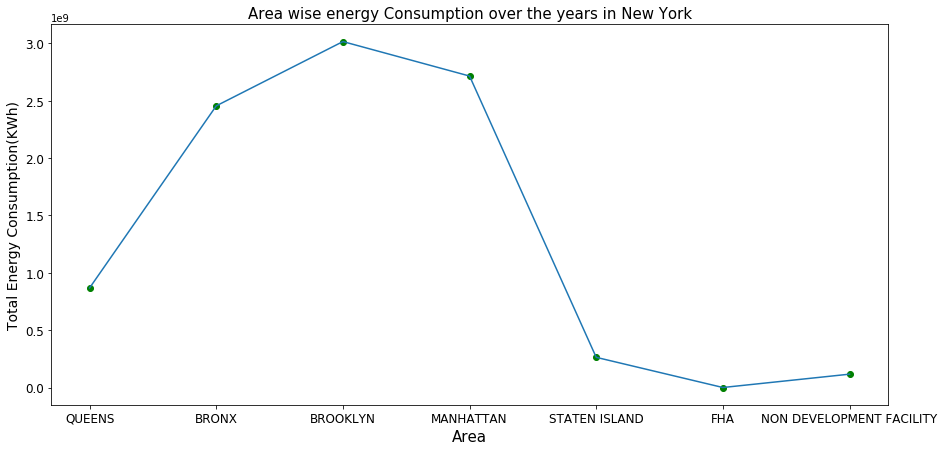

In [72]:
plt.figure(figsize=(15,7))
plt.scatter(df_energy['Borough'].unique(),abc,alpha=1,c='green')
plt.plot(df_energy['Borough'].unique(), abc)
#plt.plot(df_energy['Revenue Year'].unique())
#plt.bar(df_energy['Borough'].unique(), abc)
plt.title('Area wise energy Consumption over the years in New York', fontsize=15)
plt.xlabel('Area', size=15)
plt.ylabel('Total Energy Consumption(KWh)', fontsize=14)

plt.tick_params(labelsize=12);
#plt.ylim(100000,3015101437)
plt.show()

* Here we can see that the total energy consumption was highest in the borough Brooklyn which was around 30 hundred million KWH followed by Manhattan having around 27 hundred million and then Bronx. We can see a massive decline in consumption when we come to borough Staten Island to 2.6hundred million KWH. 
* FHA had the least total consumption of around 161104KWH throughout all the years. 

### Quick check on how many total households are present in each of the boroughs :

In [73]:
mno = []
for i in j:
    todf = df_energy[df_energy['Borough']==i]
    c = todf['Meter Number'].unique()
    mno.append(len(c))
mno

[620, 1119, 1968, 1432, 39, 18, 40]

In [74]:
df_energy['Borough'].unique()

array(['QUEENS', 'BRONX', 'BROOKLYN', 'MANHATTAN', 'STATEN ISLAND', 'FHA',
       'NON DEVELOPMENT FACILITY'], dtype=object)

#### From this, we can observe and tally that the borough 'Brooklyn' has the highest number of meters(i.e. highest number of households). Hence the energy consumption for Brooklyn is highest.

### b) Plotting yearly energy consumption in each of the boroughs (we considered data from years 2013 to 2017)

In [75]:
years = [2013, 2014, 2015, 2016, 2017]
energy = []
borough=df_energy['Borough'].unique()
for i in years:
    temp_df = df_energy[df_energy['Revenue Year'] == i]
    boroughlist = []
    for j in borough:
        temp1_df = temp_df[temp_df['Borough'] == j]
        boroughlist.append(temp1_df['Consumption (KWH)'].sum())
    energy.append(boroughlist)
energy

[[113440771, 319405977, 401088960, 362463110, 34438301, 34719, 29296143],
 [115780015, 309159494, 384026397, 351785628, 33602999, 28234, 28415470],
 [118202301, 321664191, 402873732, 366150588, 35500035, 16844, 0],
 [118615553, 329176649, 404869657, 370776598, 34939004, 19869, 0],
 [111101327, 312821646, 374818052, 313199705, 32982096, 23411, 0]]

<Figure size 1440x576 with 0 Axes>

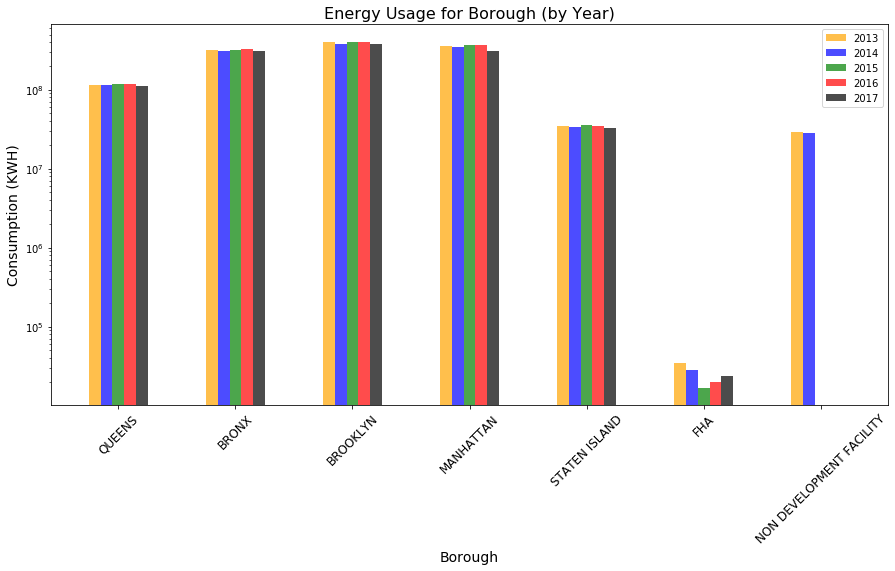

In [76]:
import matplotlib.pyplot as plt
plt.figure(figsize = (20,8))
import numpy as np
borough=df_energy['Borough'].unique()
pos = list(range(len(borough))) 
width = 0.1
r1 = np.arange(len(energy[0]))
r2 = [x + width for x in r1]
r3 = [x + width for x in r2]
r4 = [x + width for x in r3]
r5 = [x + width for x in r4]
fig, ax = plt.subplots(figsize=(15,7))
plt.bar(r1,energy[0],width,alpha=0.7,color="orange" ,label="2013")
plt.bar(r2,energy[1],width,alpha=0.7,color="blue",label="2014")
plt.bar(r3,energy[2],width,alpha=0.7,color="green",label="2015")
plt.bar(r4,energy[3],width,alpha=0.7,color="red",label="2016")
plt.bar(r5,energy[4],width,alpha=0.7,color="black",label="2017")
ax.set_xlabel('Borough',fontsize=14)
ax.set_ylabel('Consumption (KWH)',fontsize=14)
ax.set_title('Energy Usage for Borough (by Year)',fontsize=16)
ax.set_xticks([r + 2*width for r in range(len(energy[0]))])
ax.set_xticklabels(labels=borough,rotation=45,fontsize=12)
plt.yscale("log")
plt.legend()
plt.show()

Here we have tried to visualize and study the yearly energy consumption in each of the boroughs for some specific years. We have considered the years 2013- 2017
* Here considering the highest ranked Borough in consumption which is Brooklyn, we could observe that the housholds in Brooklyn consumed maximum energy resources in the year 2015 and 2016. Notice that its total consumption in these two years is almost same. But its consumption declined in the year 2013 which still remains highest among all other boroughs consumption in that year. 
* There was not much of a drastic variation in consumption in each of the years for majority of boroughs, except for Federal Housing Administration(FHA) where we could see a considerate decline in consumption from years 2013 to 2015. But after this year, a noticable increase in consumption was observed. 
* Non Development facilites consumed a good amount of energy in years 2013 and 2014 but had no consumption in the latter years 2015 to 2017. It's consumption was almost same to Staten Island's consumption in these same years.


In [77]:
list1=[]
df1=df_energy['Revenue Year'].unique()
for i in df1:
    df_new=df_energy[df_energy['Revenue Year']==i]
    energy=df_new['Consumption (KWH)'].sum()
    list1.append(energy)
        #df_new=df_energy['Revenue Year']
list1
        

[716457254,
 1144946237,
 1258397330,
 1244407691,
 1222798237,
 1260167981,
 1279640921,
 1305708049]

### c) Plot to See Yearly Consumption Of New York :

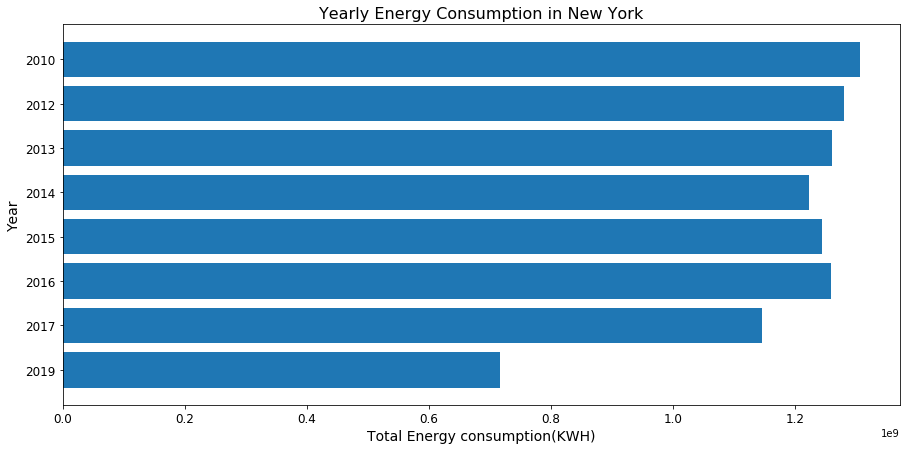

In [78]:
#Horizontal bar graph

plt.figure(figsize=(15,7))
df_energy.reset_index(inplace=True, drop=True)

plt.barh(np.arange(len(df_energy['Revenue Year'].unique())), list1, align='center')
plt.yticks(np.arange(len(df_energy['Revenue Year'].unique())), df_energy['Revenue Year'].unique())
plt.tick_params(labelsize=12)
plt.xlabel('Total Energy consumption(KWH)', fontdict={'fontsize': 14})
plt.ylabel('Year', fontdict={'fontsize': 14})
plt.title('Yearly Energy Consumption in New York',fontsize=16)
plt.show()

* Next we move on to see various trends in each year in New York City. We plotted a Horizontal Bar graph here. Here we can see that over the years there has been a noticable decreasing change in the consumption of energy resources from year 2010 to the ongoing year 2019. 
* We can see that maximum total energy was consumed in the year 2010 which was around 1.4 Billion KWH throughout all the years. There was quite a noticable decreasing change in the following year till year 2014. 
* However, after 2014, we noticed a considerate amount of increase in consumption for the next two years 2015 and 2016 after which it again decreased substantially for the following years. The consumption was the least in the ongoing year 2019 which is about 7 hundred million KWH.

### Calculating the total revenue collected per year :

In [79]:
list_revenue=[]
j=df_energy['Revenue Year'].unique()
for i in j:
    df_rev=df_energy[df_energy['Revenue Year']==i]
    revenue=df_rev['KWH Charges'].sum()
    list_revenue.append(revenue)
list_revenue

[29631025.379999995,
 48796588.37,
 48795993.58,
 55494546.379999995,
 65485183.75000001,
 69334605.36,
 73667303.0,
 75347136.05]

### Rounding off the readings upto 2 decimal places :

In [80]:
revenue_new=map(lambda x : round(x,2),list_revenue)
rev_final=(list(revenue_new))
rev_final

[29631025.38,
 48796588.37,
 48795993.58,
 55494546.38,
 65485183.75,
 69334605.36,
 73667303.0,
 75347136.05]

### d) Pie Chart to visualize the total revenue collected in each year :

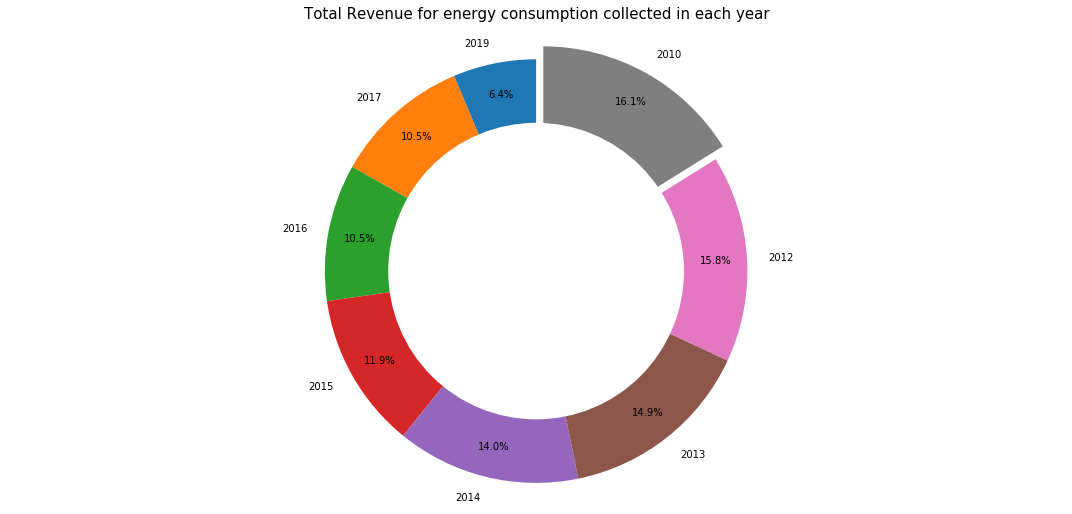

In [81]:
fig, ax1 = plt.subplots(figsize=(15,7))
labels = df_energy['Revenue Year'].unique()
explode = (0,0,0,0,0,0,0,0.07)
plt.pie(rev_final, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
ax1.axis('equal') 
plt.tight_layout()
plt.title('Total Revenue for energy consumption collected in each year', fontsize=15)
plt.show()

* Here we can see that total revenue collected in energy consumption was maximum in the year 2010 which accounted to 16.1%.  This can be inferred by taking into consideration the previous yearly energy consumption graph which showed that the overall energy consumption was highest for year 2010. 
* From the previous graph, we saw that second highest consumption was in year 2012 and then in year 2016. But our revenue chart does not convey the same. It shows that the year that collected maximum revenue after years 2010 and 2012 is the year 2013 and NOT 2016. Inspite of having third highest consumption, revenue collected in 2016 accounted for just 10.5%. This might be the case because the energy rates per KWH could have decreased for that year.

In [82]:
#df_energy['Consumption (KWH)']
sorted(df_energy['Revenue Month'].unique())
#df_energy['Revenue Month']

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

### e) Plot to see the total energy supplied by each vendor:

In [83]:
vendors = df_energy['Vendor Name'].unique()
energy_s = []
for i in vendors:
    d_vendor = df_energy[df_energy['Vendor Name'] == i]
    energy_s.append(d_vendor['Consumption (KWH)'].sum())

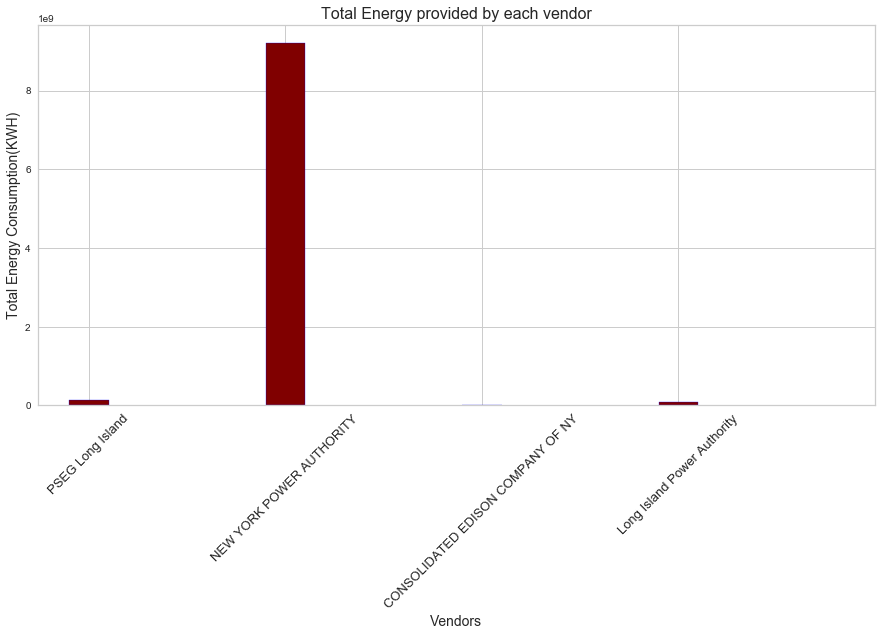

In [125]:
fig, ax1 = plt.subplots(figsize=(15,7))
labels = vendors
x = np.arange(len(labels)+1)
width=0.2
ax1.set_xlabel('Vendors', fontsize=14)
ax1.set_ylabel('Total Energy Consumption(KWH)', fontsize=14)
ax1.bar(vendors,energy_s,width,color=['maroon'],edgecolor='blue')
ax1.set_xticks(x)
ax1.set_title('Total Energy provided by each vendor',fontsize=16)
ax1.set_xticklabels(labels, rotation=45,fontsize=13)

plt.show()


* Here we can see that New York Power Authority supplies maximum energy resources follwed by PSEG Long Island. It was the least for Consolidated Edison Company Of New York.

### Calculating total monthly consumption of energy :

In [84]:
list_month=[]
df3=df_energy['Revenue Month'].unique()
for i in df3:
    df_month=df_energy[df_energy['Revenue Month']==i]
    energy_sum=df_month['Consumption (KWH)'].sum()
    list_month.append(energy_sum)
        #df_new=df_energy['Revenue Year']
list_month
        

[857051704,
 1061528543,
 1138952336,
 849804159,
 674462260,
 669895153,
 688112725,
 732324068,
 792807104,
 670378368,
 627382277,
 669825003]

### f) Energy Usage throughout in New York on a monthly basis :

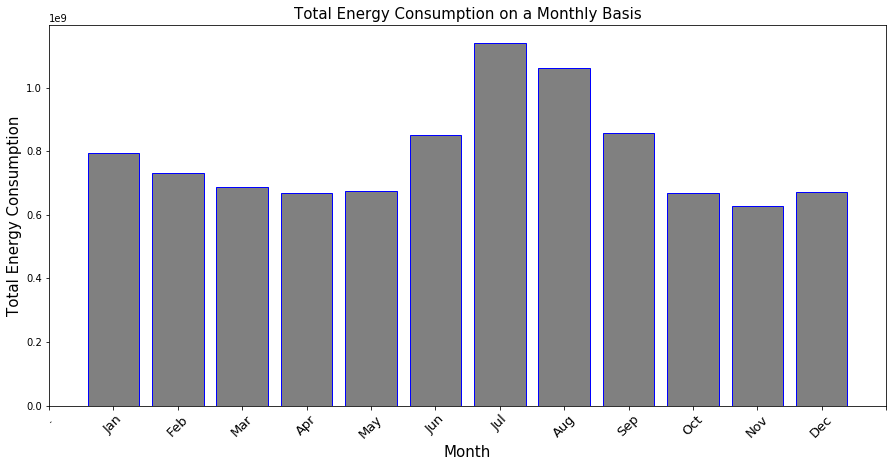

In [85]:
fig, ax1 = plt.subplots(figsize=(15,7))
labels = ('.','Jan', 'Feb', 'Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec')
x = np.arange(len(labels)+1)
ax1.set_xlabel('Month', fontsize=15)
ax1.set_ylabel('Total Energy Consumption', fontsize=15)
ax1.bar(df_energy['Revenue Month'].unique(),list_month,color=['grey'],edgecolor='blue')
ax1.set_xticks(x)
ax1.set_title('Total Energy Consumption on a Monthly Basis',fontsize=15)
ax1.set_xticklabels(labels, rotation=45,fontsize=13)

plt.show()


* Here we can see a substantial decline from the months of January to the month of May. However we can see a drastic increase in consumption for the upcoming months June, July, August. This happens because energy consumption increases in the months of summer as the use of electrical appliances like Air Conditioners uses a lot of energy compared to other appliances like heaters wich can be used in winters from Octobers to late February. So we can see that the usage was comparitively low in winters. 
* Here we can see that energy consumption rose to a peak in the month of July and was least in the month of November. 

## Studying Weather Dataset :

### g) Plot to see snowfall recorded per month :

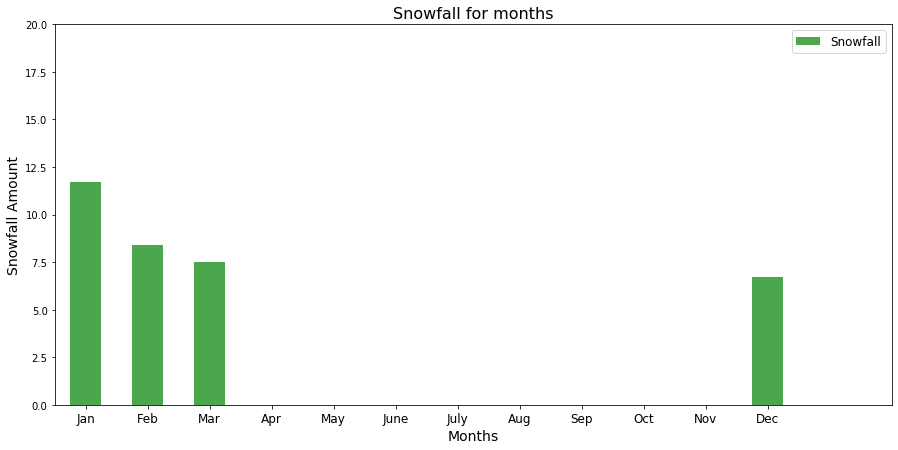

In [86]:
tdf=df_weather[df_weather['Year']==2017]
months=['Jan','Feb','Mar','Apr','May','June','July','Aug','Sep','Oct','Nov','Dec']
import matplotlib.pyplot as plt
pos = list(range(len(months))) 
width = 0.5
fig, ax = plt.subplots(figsize=(15,7))
plt.bar(pos,tdf['Snowfall'],width,alpha=0.7,color="green" ,label="Snowfall")
ax.set_ylabel('Snowfall Amount', fontsize=14)
ax.set_xlabel('Months',fontsize= 14)
ax.set_title('Snowfall for months',fontsize=16)
ax.set_xticks([p for p in pos])
ax.set_xticklabels(months,fontsize=12)
plt.xlim(min(pos)-width, max(pos)+width*4)
plt.ylim([0, 20] )
plt.legend(prop={'size': 12})
plt.show()

* Here we have plotted a simpe bar graph to observe the Snowfall that was recorded in each month. Here we can see that the snowfall recorded in winter month of December was the least. This low level observed might be because it is the early stage for snowfall in this month. As winter grows in the upcoming months, snowfall levels increase substantially with the maximum snowfall recorded in the winter month of January.
* However, a considerate decrease in snowfall can be observed in the spring season from February to March.
* As we go from March to April, there is no snowfall recorded from March onwards. This happened because the season of winter ends and summer begins.

### h) Plot to see snowfall recorded per year :

In [87]:
years = [2013, 2014, 2015, 2016, 2017]
snowfall = []
for i in years:
    temp_df = df_weather[df_weather['Year'] == i]
    abc = []
    for j in [1,2,3,4,5,6,7,8,9,10,11,12]:
        t = temp_df[temp_df['Month'] == j]
        abc.append(t['Snowfall'].sum())
    snowfall.append(abc)

<Figure size 1080x504 with 0 Axes>

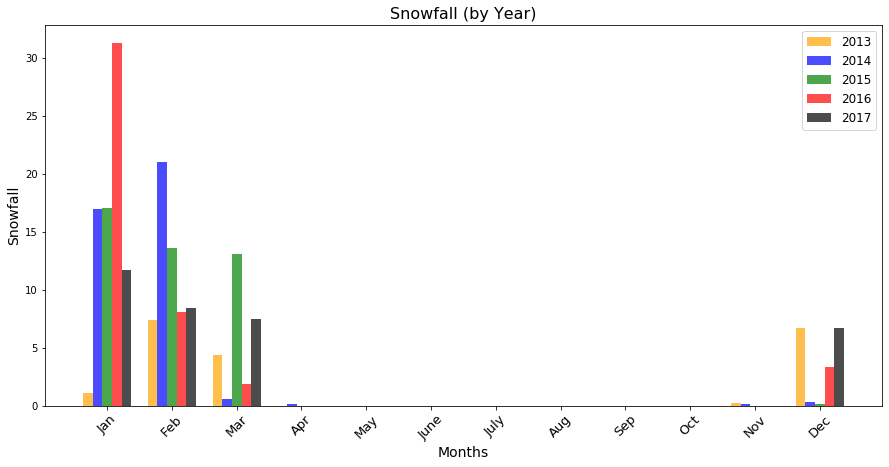

In [88]:
import matplotlib.pyplot as plt1
plt1.figure(figsize = (15,7))
import numpy as np
pos = list(range(len(months)))
width = 0.149
r1 = np.arange(len(snowfall[0]))
r2 = [x + width for x in r1]
r3 = [x + width for x in r2]
r4 = [x + width for x in r3]
r5 = [x + width for x in r4]
fig, ax = plt1.subplots(figsize=(15,7))
plt1.bar(r1,snowfall[0],width,alpha=0.7,color="orange" ,label="2013")
plt1.bar(r2,snowfall[1],width,alpha=0.7,color="blue",label="2014")
plt1.bar(r3,snowfall[2],width,alpha=0.7,color="green",label="2015")
plt1.bar(r4,snowfall[3],width,alpha=0.7,color="red",label="2016")
plt1.bar(r5,snowfall[4],width,alpha=0.7,color="black",label="2017")
ax.set_xlabel('Months',fontsize=14)
ax.set_ylabel('Snowfall',fontsize=14)
ax.set_title('Snowfall (by Year)',fontsize=16)
ax.set_xticks([r + 2*width for r in range(len(snowfall[0]))])
ax.set_xticklabels(labels=months,rotation=45,size=13)
ax.grid(False)
plt1.legend(prop={'size': 12})
plt1.show()

* Here we can observe that maximum variation in snowfall was observed in the winter month of January. 
* The snowfall level was least in this month for the year 2013 than other months. The snowfall recorded was maximum in the year 2016 and drastically decreased in the year 2017. 
* However, for the year 2014, snowfall levels were more in the spring month of February compared to the winter month of January.
* There was very minor amount of snowfall observed in the inital winter months of November. It increased considerably in the next month of December. However snowfall was the least in the December in 2014. In the year 2015, very negligible amount of snowfall was observed.

### i) Plot to see Energy Consumption in each year and each month :

In [89]:
years = [2013, 2014, 2015, 2016, 2017]
energy = []
for i in years:
    temp_df = df_energy[df_energy['Revenue Year'] == i]
    abc = []
    for j in [1,2,3,4,5,6,7,8,9,10,11,12]:
        t = temp_df[temp_df['Revenue Month'] == j]
        abc.append(t['Consumption (KWH)'].sum())
    energy.append(abc)

<Figure size 1080x504 with 0 Axes>

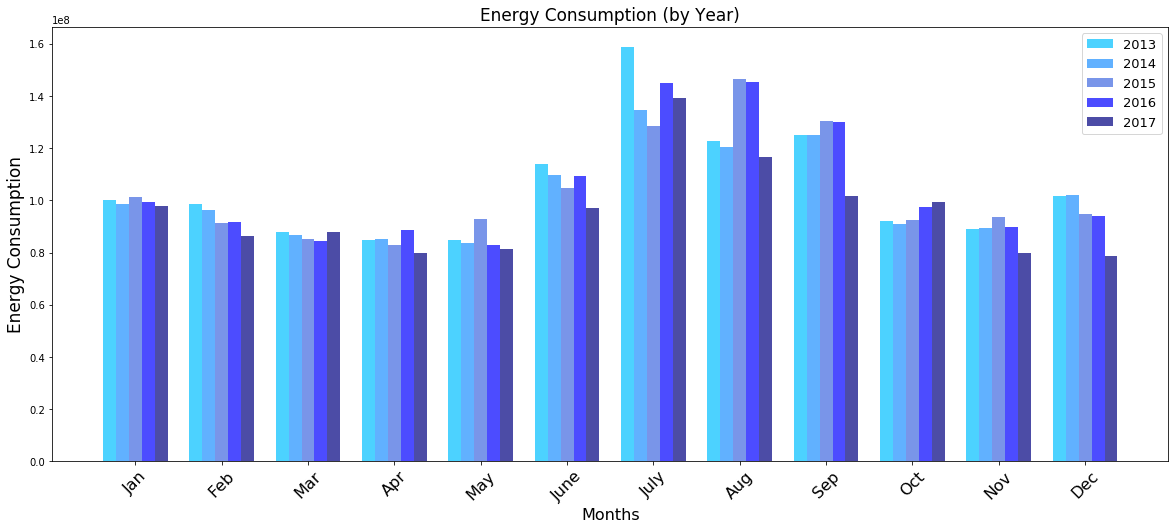

In [90]:
import matplotlib.pyplot as plt1
plt1.figure(figsize = (15,7))
import numpy as np
pos = list(range(len(months)))
width = 0.15
r1 = np.arange(len(energy[0]))
r2 = [x + width for x in r1]
r3 = [x + width for x in r2]
r4 = [x + width for x in r3]
r5 = [x + width for x in r4]
fig, ax = plt1.subplots(figsize=(20,8))
plt1.bar(r1,energy[0],width,alpha=0.7,color="deepskyblue" ,label="2013")
plt1.bar(r2,energy[1],width,alpha=0.7,color="dodgerblue",label="2014")
plt1.bar(r3,energy[2],width,alpha=0.7,color="royalblue",label="2015")
plt1.bar(r4,energy[3],width,alpha=0.7,color="blue",label="2016")
plt1.bar(r5,energy[4],width,alpha=0.7,color="navy",label="2017")
ax.set_xlabel('Months',fontsize=16)
ax.set_ylabel('Energy Consumption',fontsize=17)
ax.set_title('Energy Consumption (by Year)',fontsize=17)
ax.set_xticks([r + 2*width for r in range(len(snowfall[0]))])
ax.set_xticklabels(labels=months,rotation=45,size=16)
ax.grid(False)
plt1.legend(prop={'size': 13})
plt1.show()

* Here we simply integrated the two attributes year and month and were trying to observe trends in consumption if any. 
* As it can be observed from the above two plots i.e. Snowfall(by Year) and  Energy(by Year) , the snowfall was highest January 2016. But from energy consumption plot we can see the for Jan energy consumption was highest for 2015. So no definite relationship could be established between snowfall and energy consumption.

### j) Plot to observe trends in Temperatures in each of the months :

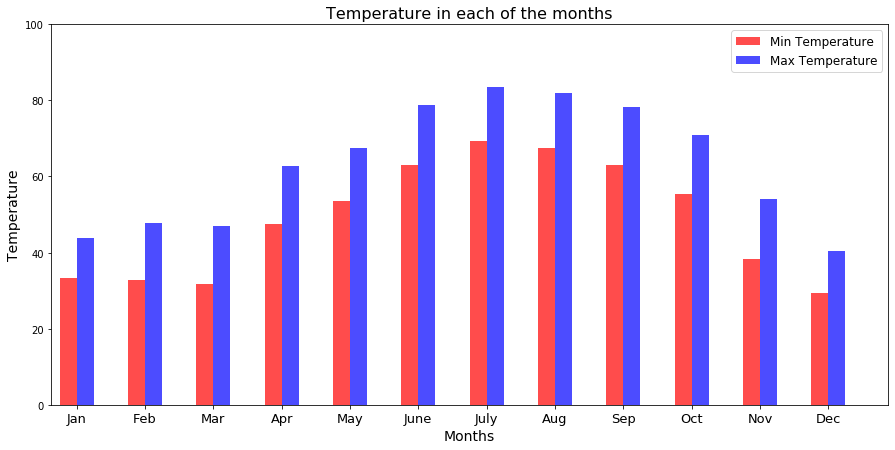

In [91]:
tdf=df_weather[df_weather['Year']==2017]
import matplotlib.pyplot as plt
import numpy as np
months=['Jan','Feb','Mar','Apr','May','June','July','Aug','Sep','Oct','Nov','Dec']
pos = list(range(len(months))) 
width = 0.25

fig, ax = plt.subplots(figsize=(15,7))
plt.bar(pos,tdf['Min Temp'],width,alpha=0.7,color="red" ,label="Min Temperature")
plt.bar([p + width for p in pos],tdf['Max Temp'],width,alpha=0.7,color="blue",label="Max Temperature")
ax.set_ylabel('Temperature',fontsize=14)
ax.set_xlabel('Months',fontsize=14)
ax.set_title('Temperature in each of the months',fontsize=16)
ax.set_xticks([p + 0.5 * width for p in pos])
ax.set_xticklabels(months, fontsize=13)
plt.xlim(min(pos)-width, max(pos)+width*4)
plt.ylim([0, 100] )
plt.legend(prop={'size': 12})
plt.show()

* Here we have plotted a bar graph to observe trends in minimum and maximum temperatures throughout the year. High temperatures were recorded from the months of June to September. Whereas low temperatures were recorded in the winter months from December to February. For remaining months the temperatures remained moderate. 
* Maximum temperature was observed in the month of July whereas minimum temperature was oseerved in the month of December.


### What made us integrate these two datasets : 

* From the above graph, an increase in energy consumption is observed during the summers and winters. Energy consumption increases as a result of increased use of heavy electrical appliances like air-conditioners and heaters. These variations in energy gave us an idea about analyzing the energy usage trend from all the households all around the year. Observing both the attributes from the weather and the energy consumption dataset, we discovered that energy consumption was correlated to changes in temperature. Hence we integrated these two datasets to find useful insights. 


###  Integrating the two datasets :

In [92]:
df_combined = df_energy.copy()
df_w = df_weather.copy()

In [93]:
df_combined['key'] = df_combined[['Revenue Year', 'Revenue Month']].apply(lambda x: ' '.join(x.astype(str)), axis=1)

In [94]:
df_w['key'] = df_w[['Year', 'Month']].apply(lambda x: ' '.join(x.astype(str)), axis=1)

In [95]:
df_combined = pd.merge(left=df_w,right=df_combined, left_on='key', right_on='key')

In [96]:
df_energy.shape

(287844, 23)

In [97]:
df_combined.shape

(287844, 32)

In [98]:
df_combined.columns

Index(['Year', 'Month', 'Precipitation', 'Snowfall', 'Snow Depth', 'Max Temp',
       'Min Temp', 'Avg Temp', 'key', 'Development Name', 'Borough',
       'Account Name', 'Location', 'TDS #', 'EDP', 'RC Code', 'Funding Source',
       'AMP #', 'Vendor Name', 'UMIS BILL ID', 'Revenue Month', '# days',
       'Meter Number', 'Estimated', 'Current Charges', 'Bill Analyzed',
       'Consumption (KWH)', 'KWH Charges', 'Consumption (KW)', 'KW Charges',
       'Other charges', 'Revenue Year'],
      dtype='object')

In [99]:
df_combined.drop('Year', axis=1, inplace=True)
df_combined.drop('Month', axis=1, inplace=True)
df_combined.drop('key', axis=1, inplace=True)

In [100]:
df_combined.shape

(287844, 29)

In [101]:
df_combined

,Precipitation,Snowfall,Snow Depth,Max Temp,Min Temp,Avg Temp,Development Name,Borough,Account Name,Location,...,Meter Number,Estimated,Current Charges,Bill Analyzed,Consumption (KWH),KWH Charges,Consumption (KW),KW Charges,Other charges,Revenue Year
0,0.05,1.4,0,38.6,25.6,32.1,OCEAN HILL APARTMENTS,BROOKLYN,OCEAN HILL APARTMENTS,BLD 01,...,8074911,N,8763.70,Yes,89200,5116.51,100.00,1300.00,2347.19,2010
1,0.05,1.4,0,38.6,25.6,32.1,EASTCHESTER GARDENS,BRONX,EASTCHESTER GARDENS,BLD 10,...,7929845,N,6901.99,Yes,80400,4611.75,0.00,0.00,2290.24,2010
2,0.05,1.4,0,38.6,25.6,32.1,JOHNSON,MANHATTAN,JOHNSON/JEFFERSON,JOHNSON BLD 07,...,4149179,N,9377.44,Yes,107520,6167.35,0.00,0.00,3210.09,2010
3,0.05,1.4,0,38.6,25.6,32.1,JOHNSON,MANHATTAN,JOHNSON/JEFFERSON,NA,...,3761919,N,2890.83,Yes,0,0.00,146.25,1901.25,989.58,2010
4,0.05,1.4,0,38.6,25.6,32.1,OCEAN HILL APARTMENTS,BROOKLYN,OCEAN HILL APARTMENTS,BLD 02,...,7908851,N,5970.85,Yes,48400,2776.22,86.00,1118.00,2076.63,2010
5,0.05,1.4,0,38.6,25.6,32.1,EASTCHESTER GARDENS,BRONX,EASTCHESTER GARDENS,BLD 09,...,7929844,N,3104.16,Yes,36160,2074.14,0.00,0.00,1030.02,2010
6,0.05,1.4,0,38.6,25.6,32.1,JOHNSON,MANHATTAN,JOHNSON/JEFFERSON,NA,...,3761829,N,3609.34,Yes,0,0.00,182.60,2373.80,1235.54,2010
7,0.05,1.4,0,38.6,25.6,32.1,JEFFERSON,MANHATTAN,JOHNSON/JEFFERSON,JEFFERSON BLD 05,...,7517042,N,4107.09,Yes,34400,1973.18,56.00,728.00,1405.91,2010
8,0.05,1.4,0,38.6,25.6,32.1,LINDEN,BROOKLYN,BOULEVARD/LINDEN,LINDEN BLD 10,...,6250893,Y,4686.21,Yes,39120,2243.92,64.80,842.40,1599.89,2010
9,0.05,1.4,0,38.6,25.6,32.1,JEFFERSON,MANHATTAN,JOHNSON/JEFFERSON,JEFFERSON BLD 11,...,7517034,N,8175.88,Yes,67000,3843.12,118.00,1534.00,2798.76,2010


### Quick check on the datatypes :

In [102]:
df_combined.dtypes

Precipitation        float64
Snowfall             float64
Snow Depth             int64
Max Temp             float64
Min Temp             float64
Avg Temp             float64
Development Name      object
Borough               object
Account Name          object
Location              object
TDS #                float64
EDP                    int64
RC Code               object
Funding Source        object
AMP #                 object
Vendor Name           object
UMIS BILL ID           int64
Revenue Month          int64
# days                 int64
Meter Number          object
Estimated             object
Current Charges      float64
Bill Analyzed         object
Consumption (KWH)      int64
KWH Charges          float64
Consumption (KW)     float64
KW Charges           float64
Other charges        float64
Revenue Year           int64
dtype: object

In [103]:
a=pd.DataFrame(df_combined.iloc[:,23])
a

,Consumption (KWH)
0,89200
1,80400
2,107520
3,0
4,48400
5,36160
6,0
7,34400
8,39120
9,67000


### Splitting our data into training and testing data :

In [104]:
from sklearn import model_selection

z=df_combined.drop(['Development Name','Borough','Account Name','Max Temp','Min Temp','Location','RC Code','Funding Source','AMP #','Vendor Name'
,'Meter Number','Estimated','Bill Analyzed','Consumption (KWH)','Other charges'],axis=1)

xtrain,xtest,ytrain,ytest=model_selection.train_test_split(np.asarray(z),np.asarray(a),test_size=0.30,random_state=42)


* Here we have split the data into 70% of Training Data and 30% of Testing Data. We are going to train our model on a maximum number of data records so that our model can train well enough. Due to this, our model will perform well when we test on our testing data.

### Loading Energy consumption(KWH) as our test data :

In [105]:
ytest.shape

(86354, 1)

## IMPLEMENTATION

### Linear Regression Model to predict energy consumption of households in each borough of New York City :

### Linear Model :
Linear model can be defined as a Euclidean dot product between two vectors:

$$
\begin{align}
  f(x; w) &amp;= w^T x = \sum_0^D w_i x_i \\
     &amp;= w_0 x_0 + w_1 x_1 + \cdots + w_D x_D
\end{align}
$$

where $w$ is a weight vector and $x$ is an input vector. When it is a one dimensional vector, it represents a straight line, so it is called linear.

### Least Squares : 
Least squares regression is a way to find the line of best fit for a set of data. It does this by creating a model that minimizes the sum of the squared vertical distances (residuals). Least squares use all the available data for training or finding the best fit. These distances are also known as weights and these weights can be calculated with the help of formula:$$ w= (X^T * X)^-1 *X^T*t $$

### Super Class Definition and Explanation:

In [106]:
#import numpy as np 
from abc import ABC, abstractmethod

# Super class for machine learning models 

class BaseModel(ABC):
    """ Super class for ITCS Machine Learning Class"""
    
    @abstractmethod
    def train(self, X, T):
        pass

    @abstractmethod
    def use(self, X):
        pass

    
class LinearModel(BaseModel):
    """
        Abstract class for a linear model 
        
        Attributes
        ==========
                ndarray
                weight vector/matrix
    """

    def __init__(self):
        """
            weight vector w is initialized as None
        """
        self.w = None

    # check if the matrix is 2-dimensional. if not, raise an exception    
    def _check_matrix(self, mat, name):
        if len(mat.shape) != 2:
            raise ValueError(''.join(["Wrong matrix ", name]))
        
    # add a bias
    def add_ones(self, X):
        """
            add a column basis to X input matrix
        """
        self._check_matrix(X, 'X')
        return np.hstack((np.ones((X.shape[0], 1)), X))

    #### abstract functions ############################
    @abstractmethod
    def train(self, X, T):
        """
            train linear model
            
            parameters
            -----------
            X     2d array
                  input data
            T     2d array
                  target labels
        """        
        pass
    
    @abstractmethod
    def use(self, X):
        """
            apply the learned model to input X
            
            parameters
            ----------
            X     2d array
                  input data
            
        """        
        pass 

* In super class we have written multiple abstract classes such as __init__ function which will help us to initialize __self__ which will be used in further classes LS to initialize the weights. We here have defined an abstract class Linear Model which consists of these abstract methods which we will be using in further classes to implement them.

### Linear Regression Class for Least Squares :

In [107]:
class LinearRegress(LinearModel): 
    """ 
        LinearRegress class 
        
        attributes
        ===========
        w    nd.array  (column vector/matrix)
             weights
    """
    def __init__(self):
        LinearModel.__init__(self)
        
    # train lease-squares model
    def train(self, X, T):
        X = self.add_ones(X)
        
        self.w= np.linalg.inv(X.T @ X) @ X.T @ T 
       
    
    # apply the learned model to data X
    def use(self, X):
        X = self.add_ones(X)
        y = X @ self.w 
        return y  

In [108]:
ls = LinearRegress()
ls.train(xtrain, ytrain)
d=ls.use(xtest)

### Code Explanation :

* t=y_train
* X=x_train
* self.w=> weights associated with each features after training our model 

weight dimension and X dimesions should be same so we add bias term

* So in this code first we give a call to __init__ method which helps us initialise self and all the attributes related to LS function like 'w' which is used to store weights. In the next fuction 'train' we train the actual model, here we pass the data set that the model is to be trained on. First step here is we add a bias to the dataset and then calculate the weights with the formula <br> $$ w= (X^T * X)^-1 *X^T*t $$<br> 

* In the code we use 'np.linalg.inv()' function to get the inverse we will also be printing the values of our weights just to check the shape of the weight matrix. In the next function that is the 'use' function, we apply this trained model on the data set that is to be tested. So here we again add bais to the dataset and run the dataset against our weights to get the predicted values. Let us now visualize the results.

### Plotting our observations :

#### 1) Plotting Predicted Values of consumption : 

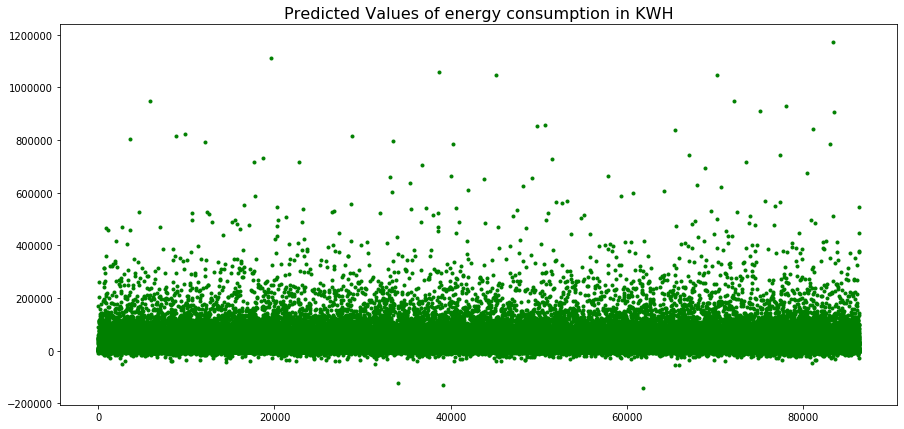

In [109]:
figure(num=None, figsize=(15,7))
plt.title('Predicted Values of energy consumption in KWH',fontsize=16)
plt.plot(d,'.',color='green')

#### 2) Plotting Actual Values of Consumption : 

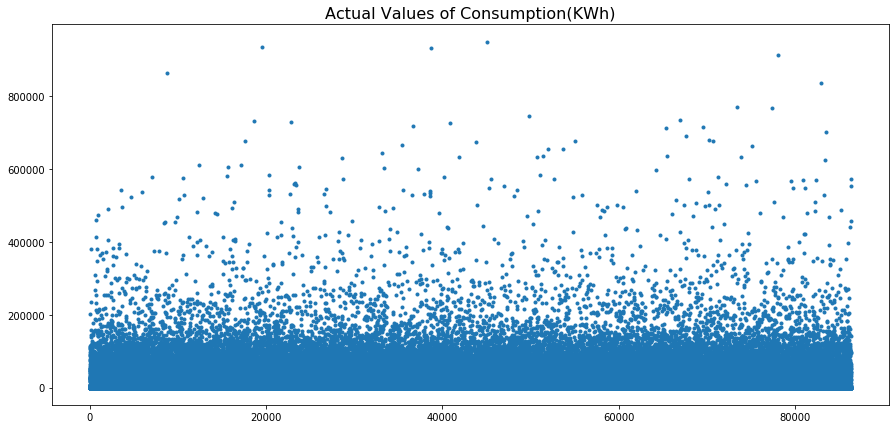

In [110]:
figure(num=None, figsize=(15,7))
plt.title('Actual Values of Consumption(KWh)',fontsize=16)
plt.plot(ytest,'.')

#### 3) Plotting Observed Values/Actual Values V/S Predicted Values of Consumption :

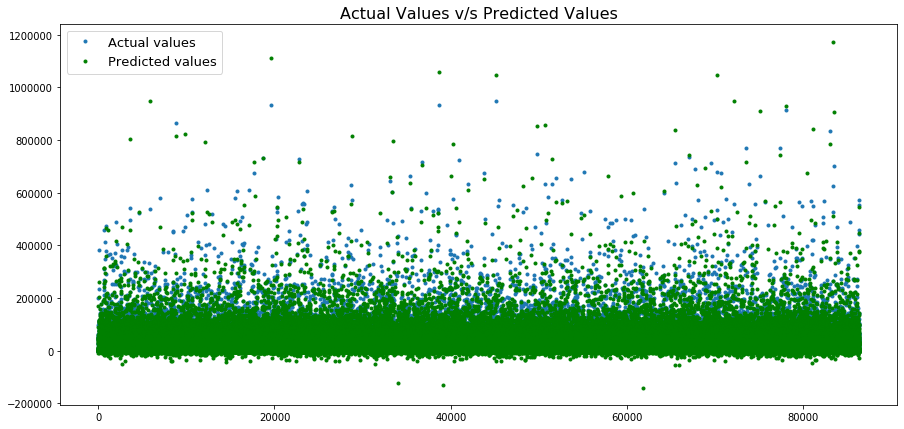

In [111]:
figure(num=None, figsize=(15,7))
plt.title('Actual Values v/s Predicted Values',fontsize=16)
plt.plot(ytest,'.')
plt.plot(d,'.',color='green')
plt.legend(['Actual values','Predicted values'],fontsize=13)

* Here we can see that our model was trained well and performed pretty well on our Test data. We can see some deviation in the values and can see outliers which can be checked by calculating a factor called Root Mean Square Error.

### Calculating Root Mean Square Error(RMSE) to check accuracy of predictions :

In [112]:
a=np.sqrt(np.mean((d-ytest)**2).mean())
a

11711.763935373616

__Note__ : The RMSE value is so high because our actual values for energy consumption are very high and even a little deviation in the predicted value will give us a big difference which is why we get this high RMSE value.

## Residual plot<br>
A residual is defined as the difference between the observed/actual value data point and the predicted value of the data point,  i.e. the error of the prediction using a prediction equation. A residual plot is a type of scatter plot in which the dependent variable or the target variable is represented by the horizontal axis and the residual values are represented by the vertical axis.<br>

We can also see from the histogram that our error is normally distributed around zero, which also generally indicates a well fitted model.

When an equation is modeled, all the data points do not necessarily pass through the model.The residual plot shows how each data point is close vertically from the graph of the prediction equation from the model. The plot shows whether the data point is above or below the graph of the prediction equation of that model which, for the data is the best fit.<br>

The prediction made by the model is on the X-axis, and the accuracy of the prediction is on the Y-axis. The distance from the line at 0 is how bad the prediction was for that value.

#### Residual = Observed – Predicted

Positive values for the residual (on the Y-axis) mean the prediction was too low, and negative values mean the prediction was too high; 0 means the guess was exactly correct.

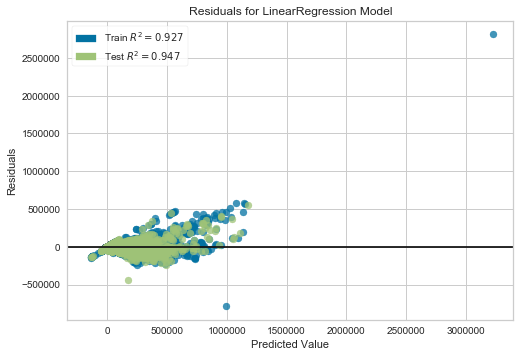

In [113]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  LinearRegression
from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import ResidualsPlot

model = LinearRegression()
visualizer = ResidualsPlot(model,hist=False)

visualizer.fit(xtrain, ytrain)  # Fit the training data to the visualizer
visualizer.score(xtest, ytest)  # Evaluate the model on the test data
visualizer.poof()

*In the plot above :*

* Train R^2 : Specifies how well the LR model fits on the Training Data
* Test R^2 : Specifies how well the LR model fits on our Testing Data<br>


* The residual plot shows the pattern of the data and determines whether the Linear Regression Model is a good fit for the data. It can show the outliers of the data clearly. If the data points on the residual plot do not follow any pattern and randomly places around the horizontal axis, then the model can be a good fit for the data. 
* Here we can see that our data is uniformly distributed around the horizontal axis whihc implies that our model is a good fit for this data. We can also clearly notice outliers below and above the horizontal line from our training data denoted in blue colour.<BR>

##  Heat Map to show significant features :

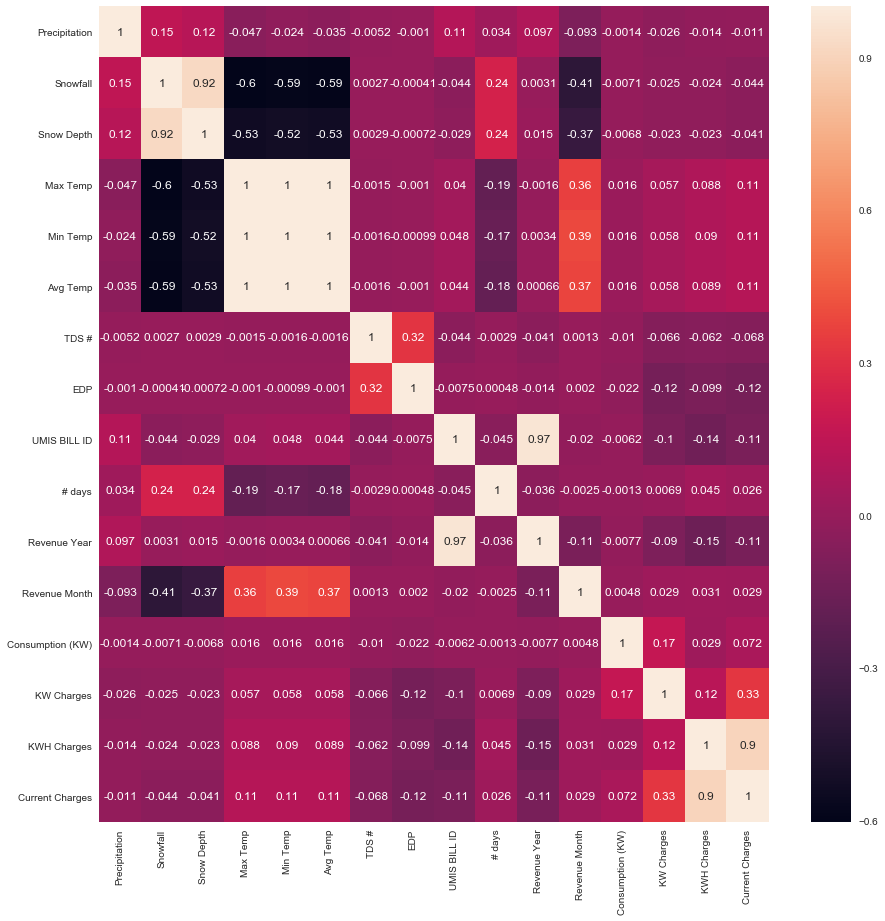

In [114]:
import seaborn as sns
plt.figure(figsize=(15,15))
features=['Precipitation','Snowfall','Snow Depth','Max Temp','Min Temp','Avg Temp','TDS #','EDP','UMIS BILL ID','# days',
          'Revenue Year','Revenue Month','Consumption (KW)','KW Charges','KWH Charges','Current Charges']
sns.heatmap(df_combined[features].corr(),annot=True)

* We have plotted a Heatmap here to see the significance of each of the attributes. 
* The positive and negative sign indicates the relationship type between the features i.e. if the sign is positive both are directly related and if the sign is negative then both the features are inversely related. Value of 1 indicates that both the features are similar or very highly related. From the heatmap it can be observed that maximum temperature,minimum temperature and average temperature have a value of 1. It indicates that the 3 features behave similarly i.e. instead of using all the three features only 1 can be used. Lower absolute values indicate that the features are very unlikely related.

## CONCLUSION   

### Overall Useful Insights Gained:

* Over the years, energy consumption has increased greatly and is still increasing. Necessary steps to study the increasing demands and meet the need for resources by such populated geographical regions is paramount.
* New York city, which is densely populated, has high energy consumption needs and over the years, its consumption has been greatly impacted due the drastic changes in external environmental factors such as snowfall, snowdepth, min/max temperatures.
* By studying various variations in energy consumption taking into account its impact by external environmental factors like weather conditions, we achieved fair predictions for energy consumption. These predictions can be analysed further and used to meet our future demands for resources in advance. 
* By analysing these predictions, one can study and estimate the future requirements for energy supply to been provided for New York City Area. These can help the concerned authorities to think of necessary steps to be taken in case of energy crisis such as possibilites of outages in that area. They can be prepared in advance for heavy energy requirements and can devise ways to handle the load. 
* Also, alternate ways of supplying energy resources such as renewable energy sources can be implemented to meet heavy energy requirements.  

## FUTURE SCOPE
<br>

* Since here we have tried to study data of a specific area (in this case, New York City and its boroughs), furthermore we will try to increase the geographical scale to cover more areas in future. 
* We will try to incorporate data on a daily to hourly basis which can help us to study the patterns of consumption pertaining to a large area in depth. 
* Also, we will try to include more external environemntal factors such as humidity, air quality index,etc which can also contribute in making our model more efficient in predicting energy consumption as well as the cost of consumption pertaining to that area.

## ACKNOWLEDGEMENT
<br>

We would like to acknowledge Prof. Tim Oates, our mentor who gave his co-operation, timely and precious guidance without which this project wouldn’t have been possible. We thank him and our TA for reviewing our work and for the fruitful comments and discussions which helped us in establishing useful insights in the project. And last but not the least, we would like to thank all our friends and colleagues who were associated with us and guided us. Our project **“Effects of Weather on Energy Consumption in New York City“** would not have been possible without the support of all the people who were involved in the successful completion.